In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




In [2]:
train = pd.read_csv('stack_stats_2020_train.csv')
test = pd.read_csv('stack_stats_2020_test.csv')

In [3]:
#(1aii) CONVERTING HTML TEXTS TO REGULAR TEXT 

#training data
train['Body'] = [BeautifulSoup(i, 'html.parser').get_text().replace("\n","") for i in train['Body']]
train['Title'] = [BeautifulSoup(i, 'html.parser').get_text().replace("\n","") for i in train['Title']]
#train['Tags'] = [BeautifulSoup(i, 'html.parser').get_text() for i in train['Tags']]

#test data 
test['Body'] = [BeautifulSoup(i, 'html.parser').get_text().replace("\n","") for i in test['Body']]
test['Title'] = [BeautifulSoup(i, 'html.parser').get_text().replace("\n","") for i in test['Title']]
#test['Tags'] = [BeautifulSoup(i, 'html.parser').get_text() for i in test['Tags']]

In [4]:
#(1aii) TRANSFORMATIONS

#Change to Lowercase

#training data
train['Body'] = train['Body'].apply(str.lower)
train['Title'] = train['Title'].apply(str.lower)
train['Tags'] = train['Tags'].apply(str.lower)

#test data 
test['Body'] = test['Body'].apply(str.lower)
test['Title'] = test['Title'].apply(str.lower)
test['Tags'] = test['Tags'].apply(str.lower)


In [5]:
#(1aii) TRANSFORMATIONS (continued)

#Remove Punctuation 
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

#training data
train['Body'] = train['Body'].apply(remove_punctuation)
train['Title'] = train['Title'].apply(remove_punctuation)
train['Tags'] = [i.replace('>', ' ') for i in train['Tags']]
train['Tags'] = train['Tags'].apply(remove_punctuation)


#test data 
test['Body'] = test['Body'].apply(remove_punctuation)
test['Title'] = test['Title'].apply(remove_punctuation)
test['Tags'] = [i.replace('>', ' ') for i in test['Tags']]
test['Tags'] = test['Tags'].apply(remove_punctuation)


In [6]:
#(1aii) TRANSFORMATIONS

#Remove Digits
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

#training data
train['Body'] = train['Body'].apply(remove_digit)
train['Title'] = train['Title'].apply(remove_digit)
train['Tags'] = train['Tags'].apply(remove_digit)

#test data 
test['Body'] = test['Body'].apply(remove_digit)
test['Title'] = test['Title'].apply(remove_digit)
test['Tags'] = test['Tags'].apply(remove_digit)


In [7]:
#(1aiv) TEXT CLEANING & DOCUMENT TERM MATRICES

#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#training data
train['Body'] = train['Body'].apply(word_tokenize)
train['Title'] = train['Title'].apply(word_tokenize)
train['Tags'] = train['Tags'].apply(word_tokenize)

#test data 
test['Body'] = test['Body'].apply(word_tokenize)
test['Title'] = test['Title'].apply(word_tokenize)
test['Tags'] = test['Tags'].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessameneces/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#(1aii) TRANSFORMATIONS (continued)

#Removing Stop Words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

#training data
train['Body'] = train['Body'].apply(remove_stopwords)
train['Title'] = train['Title'].apply(remove_stopwords)
train['Tags'] = train['Tags'].apply(remove_stopwords)

#test data 
test['Body'] = test['Body'].apply(remove_stopwords)
test['Title'] = test['Title'].apply(remove_stopwords)
test['Tags'] = test['Tags'].apply(remove_stopwords)

In [9]:
#(1aii) TRANSFORMATIONS (continued)

#Stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

#training data
train['Body'] = train['Body'].apply(stemmer)
train['Title'] = train['Title'].apply(stemmer)
train['Tags'] = train['Tags'].apply(stemmer)

#test data 
test['Body'] = test['Body'].apply(stemmer)
test['Title'] = test['Title'].apply(stemmer)
test['Tags'] = test['Tags'].apply(stemmer)


In [10]:
#(1aii) TRANSFORMATIONS (continued)

#Body, Title, Tags Identification; ex: regression_body, regression_title, regression_tag, etc
def tagging(list, id):
    new = []
    for i in list:
        new.append(i+id)
    return new

#training data
train_body = [tagging(i,'_body') for i in train["Body"]]
train_title = [tagging(i,'_title') for i in train["Title"]]
train_tags = [tagging(i,'_tag') for i in train["Tags"]]

#test
test_body = [tagging(i,'_body') for i in test["Body"]]
test_title = [tagging(i,'_title') for i in test["Title"]]
test_tags = [tagging(i,'_tag') for i in test["Tags"]]


In [11]:
training_id = [a+b+c for a,b,c in zip(train_body,train_title,train_tags)]
test_id = [a+b+c for a,b,c in zip(test_body,test_title,test_tags)]

train_final = pd.Series(training_id)
test_final = pd.Series(test_id)

#train followed by test 
train_test = train_final.append(test_final)

In [12]:
#(1aii) TRANSFORMATIONS (continued)

#Detokenization


from nltk.tokenize.treebank import TreebankWordDetokenizer


#train/test detokenized
detokenize = train_test.apply(TreebankWordDetokenizer().detokenize)



In [26]:
#(1aii) TRANSFORMATIONS (continued)

#Document-term Matrix
#Remove Infrequenet Terms -- words that do not appear in 5% or more questions

from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df=0.05)


sparse_dtm = countvec.fit_transform(detokenize)
sparse_dtm



<27496x214 sparse matrix of type '<class 'numpy.int64'>'
	with 627043 stored elements in Compressed Sparse Row format>

In [27]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names())
dtm

,_body,abl_body,actual_body,algorithm_body,also_body,analysi_body,anoth_body,answer_body,anyon_body,appli_body,...,want_body,way_body,weight_body,well_body,whether_body,without_body,wonder_body,work_body,would_body,x_body
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27491,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
27492,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27493,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27494,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
dtm.sum().sort_values(ascending=False) 

use_body             28838
model_body           28246
data_body            24659
variabl_body         18009
x_body               17278
                     ...  
pleas_body            1592
instead_body          1553
cant_body             1549
neuralnetwork_tag     1458
estim_title           1438
Length: 214, dtype: int64

In [29]:
#Splitting up DTM into training and test

#training 
X_train = dtm[:19247]
Y_train = [1 if i>=1 else 0 for i in train['Score']]

#test
X_test = dtm[19247:]
Y_test = [1 if i>=1 else 0 for i in test['Score']]





Model 1: For my first model, I used Logistic Regression. I trained the model on 581 features which were words that appeared in 5% or more questions. I computed the accuracry, precision TPR, and FPR of my model on the test set. (see code below)

In [31]:
#MODEL 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, Y_train)

#Log predictions
Y_log = logreg.predict(X_test)

cm = confusion_matrix(Y_test,Y_log )
print ("Confusion Matrix: \n", cm)
print ("\nLogistic Accuracy:", accuracy_score(Y_test, Y_log))
print('Logistic Precision:',precision_score(Y_test,Y_log))
log_accuracy = accuracy_score(Y_test, Y_log)
log_TPR = cm.ravel()[3]/(cm.ravel()[3] + cm.ravel()[2])
log_FPR = cm.ravel()[1]/(cm.ravel()[0] + cm.ravel()[1])
print ("Logistic TPR:",log_TPR)
print('Logistic FPR:',log_FPR)

Confusion Matrix: 
 [[2703 1470]
 [2134 1942]]

Logistic Accuracy: 0.5630985574008971
Logistic Precision: 0.5691676436107854
Logistic TPR: 0.4764474975466143
Logistic FPR: 0.35226455787203453


#Model 2: For my second model, I built a Random Forest Classifier. I generated 500 bootstrapped samples from my original training set. Each of these samples are then used to build an individual CART model. Each indivvidual CART model considers 5 features at each split. I computed the accuracry, precision TPR, and FPR of my Random Forest Classifier model on the test set. (see code below)

In [32]:
#Model 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, Y_train)

Y_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test, Y_rf)
print ("Confusion Matrix: \n", cm_rf)
print ("\nRandom Forest Accuracy:", accuracy_score(Y_test, Y_rf))
print('Random Forest Precision:',precision_score(Y_test, Y_rf))
rf_accuracy = accuracy_score(Y_test, Y_rf)
rf_TPR = cm_rf.ravel()[3]/(cm_rf.ravel()[3] + cm_rf.ravel()[2])
rf_FPR = cm_rf.ravel()[1]/(cm_rf.ravel()[0] + cm_rf.ravel()[1])
print ("Random Forest TPR:",rf_TPR)
print('Random Forest FPR:',rf_FPR)

Confusion Matrix: 
 [[2596 1577]
 [1995 2081]]

Random Forest Accuracy: 0.566977815492787
Random Forest Precision: 0.5688901038819026
Random Forest TPR: 0.510549558390579
Random Forest FPR: 0.37790558351306014


Model 3: For my first model, I used Linear Discriminant Analyisis. I trained the model on 581 features which were words that appeared in 2% or more questions. I computed the accuracry, precision TPR, and FPR of my model on the test set. (see code below)

In [37]:
#Model 3: Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

Y_lda = lda.predict(X_test)
cm_lda = confusion_matrix(Y_test, Y_lda)
print ("Confusion Matrix: \n", cm_lda)
print ("\nLDA Accuracy:", accuracy_score(Y_test, Y_lda))
print ("LDA Precision:", precision_score(Y_test, Y_lda))
lda_accuracy = accuracy_score(Y_test, Y_lda)
lda_TPR = cm_lda.ravel()[3]/(cm_lda.ravel()[3] + cm_lda.ravel()[2])
lda_FPR = cm_lda.ravel()[1]/(cm_lda.ravel()[0] + cm_lda.ravel()[1])
print ("LDA TPR:",lda_TPR)
print('LDA FPR:',lda_FPR)

Confusion Matrix: 
 [[2718 1455]
 [2149 1927]]

LDA Accuracy: 0.5630985574008971
LDA Precision: 0.5697811945594323
LDA TPR: 0.4727674190382728
LDA FPR: 0.3486700215672178


Model 4: For my fourth model, I built a decision tree classifier. I did cross validation by splitting the data into
k=5 folds. For each ccp, I trained the model on k-1 folds and computed the accuracy on the remaining fold. These accuracy scores were then averaged for each ccp. I chose the ccp that gave me the highest average accuracy.I computed the accuracry, precision TPR, and FPR of my model on the test set. (see code below)

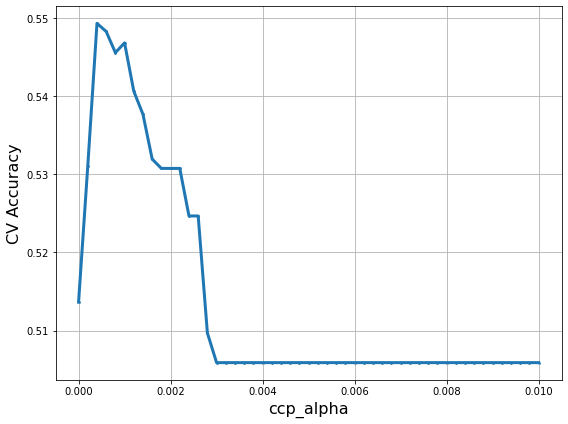

Best ccp_alpha {'ccp_alpha': 0.0004}


In [34]:
#Model 4: Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


grid_values = {'ccp_alpha': np.linspace(0, 0.01, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, Y_train)

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)


In [40]:
Y_dt = dtc_cv.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_dt)
print ("Confusion Matrix: \n", cm_dt)
print ("\nDecision Tree Accuracy:", accuracy_score(Y_test, Y_dt))
dt_accuracy = accuracy_score(Y_test, Y_dt)
print ("Decisition Tree Precision:", precision_score(Y_test, Y_dt))
dt_TPR = cm_dt.ravel()[3]/(cm_dt.ravel()[3] + cm_dt.ravel()[2])
dt_FPR = cm_dt.ravel()[1]/(cm_dt.ravel()[0] + cm_dt.ravel()[1])
print ("Decision Tree TPR:",dt_TPR)
print('Decision Tree FPR:',dt_FPR)

Confusion Matrix: 
 [[2079 2094]
 [1733 2343]]

Decision Tree Accuracy: 0.5360649775730392
Decisition Tree Precision: 0.5280594996619338
Decision Tree TPR: 0.5748282630029441
Decision Tree FPR: 0.5017972681524083


In [69]:
comparison_data = {'Logisitic Regression': [log_accuracy,log_TPR, log_FPR], 'Random Forest Classifier': 
                   [rf_accuracy, rf_TPR, rf_FPR], 'Linear Discriminant Analysis': [lda_accuracy,lda_TPR, lda_FPR],
                  'Decision Tree': [dt_accuracy,dt_TPR, dt_FPR]}
comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
comparison_table

,Logisitic Regression,Random Forest Classifier,Linear Discriminant Analysis,Decision Tree
Accuracy,0.563099,0.566978,0.563099,0.536065
TPR,0.476447,0.510550,0.472767,0.574828
FPR,0.352265,0.377906,0.348670,0.501797
